In [26]:
import random
import numpy as np
import PDSVRP_instance
import copy

import time

In [27]:
from importnb import Notebook

with Notebook():
    import heuristic as h
    import utilities as u

without ls

In [28]:
def initial_solution_construction_no_LS(instance, w1, w2, w3, w4, w5, gamma):
    A = [c for c in range (1, instance.N)]
    solution = h.recreate(instance, [[[[] for _ in range(instance.h)], [[] for _ in range(instance.D)]],A], w1, w2, w3, w4, w5, gamma)
    return solution

In [29]:
def SISSRs_no_LS(instance, sigma, c_average_removed, L_max, w1, w2, w3, w4, w5, gamma, n_nearest, delta, epsilon, iter_imp, iter_max, p_min, p_max, max_unfeasible_swaps_perturb):
    s_0 = initial_solution_construction_no_LS(instance, w1, w2, w3, w4, w5, gamma)
    s_curr = s_0
    s_best = s_0
    iterations_without_improvement = 0
    iteration_counter = 0
    while (iteration_counter < iter_max):
        s = h.ruin_and_recreate(instance, copy.deepcopy(s_curr), sigma, c_average_removed, L_max, w1, w2, w3, w4, w5, gamma)
        if u.cost(instance, s) < u.cost(instance, s_curr)*(1+delta):
            s_curr = s
            if u.cost(instance, s_curr) < u.cost(instance, s_best):
                s_best = s_curr
                iterations_without_improvement = 0
            else:
                iterations_without_improvement += 1
        if iterations_without_improvement >= iter_imp:
            s_curr = h.perturbate(instance, s_curr, p_min, p_max, max_unfeasible_swaps_perturb)
            iterations_without_improvement = 0
        delta = delta * epsilon
        iteration_counter+=1
    
    return s_best

no Threshold acceptence

In [30]:
def SISSRs_no_TA(instance, sigma, c_average_removed, L_max, w1, w2, w3, w4, w5, gamma, n_nearest, delta, epsilon, iter_imp, iter_max, p_min, p_max, max_unfeasible_swaps_perturb):
    s_0 = h.initial_solution_construction(instance, w1, w2, w3, w4, w5, gamma, n_nearest)
    s_curr = s_0
    s_best = s_0
    iterations_without_improvement = 0
    iteration_counter = 0
    while (iteration_counter < iter_max):
        s = h.ruin_and_recreate(instance, copy.deepcopy(s_curr), sigma, c_average_removed, L_max, w1, w2, w3, w4, w5, gamma)
        if u.cost(instance, s) < u.cost(instance, s_curr):
            s_curr = h.local_search(instance, s, n_nearest)
            if u.cost(instance, s_curr) < u.cost(instance, s_best):
                s_best = s_curr
                iterations_without_improvement = 0
            else:
                iterations_without_improvement += 1
        if iterations_without_improvement >= iter_imp:
            s_curr = h.perturbate(instance, s_curr, p_min, p_max, max_unfeasible_swaps_perturb)
            iterations_without_improvement = 0
        iteration_counter+=1
    
    return s_best

no perturbation

In [31]:
def SISSRs_no_pert(instance, sigma, c_average_removed, L_max, w1, w2, w3, w4, w5, gamma, n_nearest, delta, epsilon, iter_imp, iter_max, p_min, p_max, max_unfeasible_swaps_perturb):
    s_0 = h.initial_solution_construction(instance, w1, w2, w3, w4, w5, gamma, n_nearest)
    s_curr = s_0
    s_best = s_0
    iterations_without_improvement = 0
    iteration_counter = 0
    
    while (iteration_counter < iter_max):
        s = h.ruin_and_recreate(instance, copy.deepcopy(s_curr), sigma, c_average_removed, L_max, w1, w2, w3, w4, w5, gamma)
        if u.cost(instance, s) < u.cost(instance, s_curr) * (1 + delta):
            s_curr = h.local_search(instance, s, n_nearest)
            if u.cost(instance, s_curr) < u.cost(instance, s_best):
                s_best = s_curr
                iterations_without_improvement = 0
            else:
                iterations_without_improvement += 1
        delta = delta * epsilon
        iteration_counter += 1
    
    return s_best


no sweep removal

In [32]:
def ruin_and_recreate_no_sweep(instance, solution, sigma, c_average_removed, L_max, w1, w2, w3, w4, w5, gamma):
   
    solution = h.random_drone_customer_removal(solution, sigma)

    solution = h.string_removal(instance, solution, c_average_removed, L_max)

    solution = h.recreate(instance, solution, w1, w2, w3, w4, w5, gamma)

    return solution


In [33]:
def SISSRs_no_sweep(instance, sigma, c_average_removed, L_max, w1, w2, w3, w4, w5, gamma, n_nearest, delta, epsilon, iter_imp, iter_max, p_min, p_max, max_unfeasible_swaps_perturb):
    
    s_0 = h.initial_solution_construction(instance, w1, w2, w3, w4, w5, gamma, n_nearest)
    s_curr = s_0
    s_best = s_0
    iterations_without_improvement = 0
    iteration_counter = 0
    while (iteration_counter < iter_max):
        s = ruin_and_recreate_no_sweep(instance, copy.deepcopy(s_curr), sigma, c_average_removed, L_max, w1, w2, w3, w4, w5, gamma)
        if u.cost(instance, s) < u.cost(instance, s_curr)*(1+delta):
            s_curr = h.local_search(instance, s, n_nearest)
            if u.cost(instance, s_curr) < u.cost(instance, s_best):
                s_best = s_curr
                iterations_without_improvement = 0
            else:
                iterations_without_improvement += 1
        if iterations_without_improvement >= iter_imp:
            s_curr = h.perturbate(instance, s_curr, p_min, p_max, max_unfeasible_swaps_perturb)
            iterations_without_improvement = 0
        delta = delta * epsilon
        iteration_counter+=1
    
    return s_best

no random removal

In [34]:
def ruin_and_recreate_no_rand(instance, solution, sigma, c_average_removed, L_max, w1, w2, w3, w4, w5, gamma):
   
    solution = h.sweep_removal_operator(instance, solution, sigma)

    solution = h.string_removal(instance, solution, c_average_removed, L_max)

    solution = h.recreate(instance, solution, w1, w2, w3, w4, w5, gamma)

    return solution


In [35]:
def SISSRs_no_rand(instance, sigma, c_average_removed, L_max, w1, w2, w3, w4, w5, gamma, n_nearest, delta, epsilon, iter_imp, iter_max, p_min, p_max, max_unfeasible_swaps_perturb):
    s_0 = h.initial_solution_construction(instance, w1, w2, w3, w4, w5, gamma, n_nearest)
    s_curr = s_0
    s_best = s_0
    iterations_without_improvement = 0
    iteration_counter = 0
    while (iteration_counter < iter_max):
        s = ruin_and_recreate_no_rand(instance, copy.deepcopy(s_curr), sigma, c_average_removed, L_max, w1, w2, w3, w4, w5, gamma)
        if u.cost(instance, s) < u.cost(instance, s_curr)*(1+delta):
            s_curr = h.local_search(instance, s, n_nearest)
            if u.cost(instance, s_curr) < u.cost(instance, s_best):
                s_best = s_curr
                iterations_without_improvement = 0
            else:
                iterations_without_improvement += 1
        if iterations_without_improvement >= iter_imp:
            s_curr = h.perturbate(instance, s_curr, p_min, p_max, max_unfeasible_swaps_perturb)
            iterations_without_improvement = 0
        delta = delta * epsilon
        iteration_counter+=1
    
    return s_best

tests

farei una cosa del genere (vedi sotto) per testare ogni variante con diverse istanze e salvare in un csv il valore medio della differenza percentuale rispetto alla soluzione trovata con il SISSRs originale e il tempo medio impiegato

osservare: local search più dispendioso ma più importante

In [36]:
import time
import copy
import pandas as pd

def test_variants_on_instances(original_method, variants, instances,  sigma, c_average_removed, L_max, w1, w2, w3, w4, w5, gamma, n_nearest, delta, epsilon, iter_imp, iter_max, p_min, p_max, max_unfeasible_swaps_perturb):
    results = []
            
    for instance_name in instances:
        print("Original method for instance " + instance_name)
        instance = PDSVRP_instance.PDSVRPInstance("instances/" + instance_name + ".txt") # Assumi che le istanze abbiano una rappresentazione stringa unica
        
                # Esegui il metodo originale
        start_time = time.time()
        sol_original = original_method(instance, sigma, c_average_removed, L_max, w1, w2, w3, w4, w5, gamma, n_nearest, delta, epsilon, iter_imp, iter_max, p_min, p_max, max_unfeasible_swaps_perturb)
        end_time = time.time()
        cost_original = u.cost(instance, sol_original)
        elapsed_time_original = end_time - start_time

        for variant in variants:
            variant_name = variant.__name__
            print(variant_name)
                
            # Esegui la variante
            start_time = time.time()
            sol_variant = variant(instance, sigma, c_average_removed, L_max, w1, w2, w3, w4, w5, gamma, n_nearest, delta, epsilon, iter_imp, iter_max, p_min, p_max, max_unfeasible_swaps_perturb)
            end_time = time.time()
            cost_variant =u.cost(instance, sol_variant)
            elapsed_time_variant = end_time - start_time
                
            # Calcola la differenza percentuale dei costi
            cost_difference = ((cost_variant - cost_original) / cost_original) * 100
                
                # Memorizza i risultati
            results.append({
                "method": original_method.__name__,
                "variant": variant_name,
                "instance": instance_name,
                "cost_original": cost_original,
                "cost_variant": cost_variant,
                "cost_difference_percentage": cost_difference,
                "time_original": elapsed_time_original,
                "time_variant": elapsed_time_variant,
                "iter_imp" : iter_imp,
                "iter_max": iter_max
            })
    
    return results

def save_results_to_csv(results, filename):
    df = pd.DataFrame(results)
    df.to_csv(filename, index=False)

# Definisci i metodi e le varianti
method = h.SISSRs
variants = [SISSRs_no_LS, SISSRs_no_TA, SISSRs_no_pert, SISSRs_no_rand, SISSRs_no_sweep]
instances = []

for customers_position in ["c", "r", "rc"]:
    for depot_position in ["c", "e", "r"]:
        instances.append("30-" + customers_position + "-1-" + depot_position)

# Esegui i test e ottieni i risultati
results = test_variants_on_instances(method, variants, instances, 0.3, 4.5, 4.5, 5,1,1,2,2, 0.1, 20, 0.1, 0.999975, 500, 5000, 3, 3, 9)

# Salva i risultati in un file CSV
save_results_to_csv(results, "results/impact_of_components_results.csv")


Original method for instance 30-c-1-c
SISSRs_no_LS
SISSRs_no_TA
SISSRs_no_pert
SISSRs_no_rand
SISSRs_no_sweep
Original method for instance 30-c-1-e
SISSRs_no_LS
SISSRs_no_TA
SISSRs_no_pert
SISSRs_no_rand
SISSRs_no_sweep
Original method for instance 30-c-1-r
SISSRs_no_LS
SISSRs_no_TA
SISSRs_no_pert
SISSRs_no_rand
SISSRs_no_sweep
Original method for instance 30-r-1-c
SISSRs_no_LS
SISSRs_no_TA
SISSRs_no_pert
SISSRs_no_rand
SISSRs_no_sweep
Original method for instance 30-r-1-e
SISSRs_no_LS
SISSRs_no_TA
SISSRs_no_pert
SISSRs_no_rand
SISSRs_no_sweep
Original method for instance 30-r-1-r
SISSRs_no_LS
SISSRs_no_TA
SISSRs_no_pert
SISSRs_no_rand
SISSRs_no_sweep
Original method for instance 30-rc-1-c
SISSRs_no_LS
SISSRs_no_TA
SISSRs_no_pert
SISSRs_no_rand
SISSRs_no_sweep
Original method for instance 30-rc-1-e
SISSRs_no_LS
SISSRs_no_TA
SISSRs_no_pert
SISSRs_no_rand
SISSRs_no_sweep
Original method for instance 30-rc-1-r
SISSRs_no_LS
SISSRs_no_TA
SISSRs_no_pert
SISSRs_no_rand
SISSRs_no_sweep


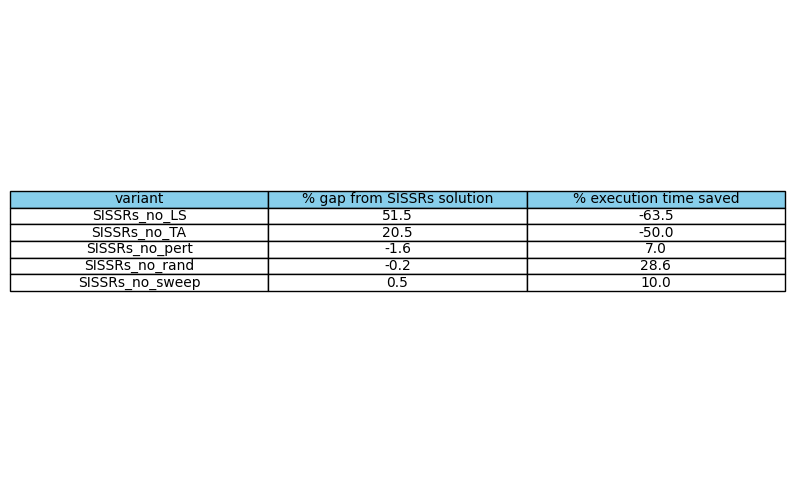

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leggi il file CSV
file_path = 'results/impact_of_components_results.csv'  # sostituisci con il percorso corretto del tuo file
data = pd.read_csv(file_path)

# Calcola la differenza tra time_original e time_variant
data['time_difference'] = (-data['time_original'] + data['time_variant']) * 100 / data['time_original']

# Raggruppa i dati per la colonna 'variant' e calcola la media della cost_difference_percentage e della differenza di tempo
grouped_data = data.groupby('variant').agg({
    'cost_difference_percentage': 'mean',
    'time_difference': 'mean'
}).reset_index()

# Approssima i numeri a una sola cifra decimale
grouped_data['cost_difference_percentage'] = grouped_data['cost_difference_percentage'].round(1)
grouped_data['time_difference'] = grouped_data['time_difference'].round(1)

# Rinomina le colonne
grouped_data.columns = ['variant', '% gap from SISSRs solution', '% execution time saved']

# Crea una tabella utilizzando matplotlib
fig, ax = plt.subplots(figsize=(10, 6))  # puoi regolare le dimensioni della figura
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=grouped_data.values, colLabels=grouped_data.columns, cellLoc='center', loc='center', colColours=['skyblue']*len(grouped_data.columns))

# Mostra la tabella
plt.show()

